### Load libraries

In [53]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import set_config
set_config(display="diagram")
np.random.seed(42)

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.inspection import permutation_importance





print(sys.version) # version of Python
print(sklearn.__version__) # version of sklearn module

3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]
1.3.2


### 1. Data exploration

In [54]:
data_path = 'game_data.csv'
encoding = 'utf-8'
data = pd.read_csv(data_path, delimiter=',', encoding=encoding)
data.head()

,Punish,Ignite,Smite,Ghost,Heal,Interfere,Stifle,Cleanse,Exhaust,Flash,...,PositionMostPlay_1,PositionMostPlay_2,PositionMostPlay_3,PositionMostPlay_4,PositionMostPlay_5,PositionLeastPlay_1,PositionLeastPlay_2,PositionLeastPlay_3,PositionLeastPlay_4,PositionLeastPlay_5
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
1,0,0,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Punish                   1058 non-null   int64
 1   Ignite                   1058 non-null   int64
 2   Smite                    1058 non-null   int64
 3   Ghost                    1058 non-null   int64
 4   Heal                     1058 non-null   int64
 5   Interfere                1058 non-null   int64
 6   Stifle                   1058 non-null   int64
 7   Cleanse                  1058 non-null   int64
 8   Exhaust                  1058 non-null   int64
 9   Flash                    1058 non-null   int64
 10  Neuroticism              1058 non-null   int64
 11  Extraversion             1058 non-null   int64
 12  Openness                 1058 non-null   int64
 13  Agreeableness            1058 non-null   int64
 14  Conscientiousness        1058 non-null   int64
 15  Favo

In [56]:
# calculate the class distribution percentage 
print(data['Neuroticism'].value_counts(normalize=True))

Neuroticism
1    0.50189
0    0.49811
Name: proportion, dtype: float64


In [57]:
# calculate the class distribution percentage 
print(data['Extraversion'].value_counts(normalize=True))

Extraversion
1    0.500945
0    0.499055
Name: proportion, dtype: float64


In [58]:
# calculate the class distribution percentage 
print(data['Openness'].value_counts(normalize=True))

Openness
1    0.545369
0    0.454631
Name: proportion, dtype: float64


In [59]:
# calculate the class distribution percentage 
print(data['Agreeableness'].value_counts(normalize=True))

Agreeableness
1    0.551985
0    0.448015
Name: proportion, dtype: float64


In [60]:
# calculate the class distribution percentage 
print(data['Conscientiousness'].value_counts(normalize=True))

Conscientiousness
1    0.504726
0    0.495274
Name: proportion, dtype: float64


In [61]:
print(data.columns)


Index(['Punish', 'Ignite', 'Smite', 'Ghost', 'Heal', 'Interfere', 'Stifle',
       'Cleanse', 'Exhaust', 'Flash', 'Neuroticism', 'Extraversion',
       'Openness', 'Agreeableness', 'Conscientiousness', 'FavouriteRole_1',
       'FavouriteRole_2', 'FavouriteRole_3', 'FavouriteRole_4',
       'FavouriteRole_5', 'FavouriteRole_6', 'LeastFavoriteRole_1',
       'LeastFavoriteRole_2', 'LeastFavoriteRole_3', 'LeastFavoriteRole_4',
       'LeastFavoriteRole_5', 'LeastFavoriteRole_6', 'RoleMostPlay_1',
       'RoleMostPlay_2', 'RoleMostPlay_3', 'RoleMostPlay_4', 'RoleMostPlay_5',
       'RoleMostPlay_6', 'RoleLeastPlay_1', 'RoleLeastPlay_2',
       'RoleLeastPlay_3', 'RoleLeastPlay_4', 'RoleLeastPlay_5',
       'RoleLeastPlay_6', 'BestRole_1', 'BestRole_2', 'BestRole_3',
       'BestRole_4', 'BestRole_5', 'BestRole_6', 'WorstRole_1', 'WorstRole_2',
       'WorstRole_3', 'WorstRole_4', 'WorstRole_5', 'WorstRole_6',
       'FavoritePosition_1', 'FavoritePosition_2', 'FavoritePosition_3',
       

In [62]:
X = data[['Punish', 'Ignite', 'Smite', 'Ghost', 'Heal', 'Interfere', 'Stifle',
       'Cleanse', 'Exhaust', 'Flash','FavouriteRole_1',
       'FavouriteRole_2', 'FavouriteRole_3', 'FavouriteRole_4',
       'FavouriteRole_5', 'FavouriteRole_6', 'LeastFavoriteRole_1',
       'LeastFavoriteRole_2', 'LeastFavoriteRole_3', 'LeastFavoriteRole_4',
       'LeastFavoriteRole_5', 'LeastFavoriteRole_6', 'RoleMostPlay_1',
       'RoleMostPlay_2', 'RoleMostPlay_3', 'RoleMostPlay_4', 'RoleMostPlay_5',
       'RoleMostPlay_6', 'RoleLeastPlay_1', 'RoleLeastPlay_2',
       'RoleLeastPlay_3', 'RoleLeastPlay_4', 'RoleLeastPlay_5',
       'RoleLeastPlay_6', 'BestRole_1', 'BestRole_2', 'BestRole_3',
       'BestRole_4', 'BestRole_5', 'BestRole_6', 'WorstRole_1', 'WorstRole_2',
       'WorstRole_3', 'WorstRole_4', 'WorstRole_5', 'WorstRole_6',
       'FavoritePosition_1', 'FavoritePosition_2', 'FavoritePosition_3',
       'FavoritePosition_4', 'FavoritePosition_5', 'LeastFavoritePosition_1',
       'LeastFavoritePosition_2', 'LeastFavoritePosition_3',
       'LeastFavoritePosition_4', 'LeastFavoritePosition_5', 'BestPosition_1',
       'BestPosition_2', 'BestPosition_3', 'BestPosition_4', 'BestPosition_5',
       'WorstPosition_1', 'WorstPosition_2', 'WorstPosition_3',
       'WorstPosition_4', 'WorstPosition_5', 'PositionMostPlay_1',
       'PositionMostPlay_2', 'PositionMostPlay_3', 'PositionMostPlay_4',
       'PositionMostPlay_5', 'PositionLeastPlay_1', 'PositionLeastPlay_2',
       'PositionLeastPlay_3', 'PositionLeastPlay_4', 'PositionLeastPlay_5']]


### 2. Experiments

### 2.1 Neuroticism

#### 2.1.1 Split data 

In [63]:

y = data['Neuroticism']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42, shuffle=True,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((793, 76), (265, 76), (793,), (265,))

#### 2.1.2 Baseline model

In [64]:
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)
accuracy = dummy.score(X_train, y_train)
print(accuracy)

y_pred = dummy.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f1)

0.501891551071879
0.33417085427135673


#### 2.1.3 Model performance comparison (evaluation metric: macro F1 score)

#### 1) Logistic Regression 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [65]:

lr = make_pipeline(LogisticRegression(class_weight='balanced', random_state=42))

lr_param_grid={'logisticregression__C': [0.01, 0.1, 1.0, 10, 100],
               'logisticregression__solver': ['newton-cg', 'sag', 'saga','lbfgs']}

lr_gs = GridSearchCV(lr, lr_param_grid, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
lr_gs.fit(X_train, y_train)

print(f"best score: {lr_gs.best_score_}")
print(f"best params: {lr_gs.best_params_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
best score: 0.6693592692231615
best params: {'logisticregression__C': 0.1, 'logisticregression__solver': 'newton-cg'}


#### 10-fold cv to make sure the model is not overfitting

In [66]:
best_lr = lr_gs.best_estimator_

cv_scores_lr = cross_val_score(best_lr, X_train, y_train, cv=10, scoring='f1_macro')
print(cv_scores_lr)
print(cv_scores_lr.mean())
print(cv_scores_lr.std())             

[0.62406015 0.775      0.71137255 0.6127451  0.6573494  0.61970475
 0.69498069 0.60734327 0.72147436 0.66956242]
0.6693592692231615
0.052924972860890415


#### hold-out method to evaluate the classification performance

In [67]:
best_lr.fit(X_train, y_train)
lr_pred = best_lr.predict(X_test)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.65      0.62      0.64       132
           1       0.64      0.67      0.65       133

    accuracy                           0.65       265
   macro avg       0.65      0.65      0.65       265
weighted avg       0.65      0.65      0.65       265



#### 2) Decision Tree 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [68]:
dt = make_pipeline(DecisionTreeClassifier(class_weight='balanced', random_state=42))

dt_param_grid={'decisiontreeclassifier__criterion': ['gini', 'entropy', 'log_loss'],
               'decisiontreeclassifier__max_depth': [20, 30, 40, 50, 60, 70, 80, 90, 100]}

dt_gs = GridSearchCV(dt, dt_param_grid, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
dt_gs.fit(X_train, y_train)

print(f"best score: {dt_gs.best_score_}")
print(f"best params: {dt_gs.best_params_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
best score: 0.6315135588237805
best params: {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 30}


#### 10-fold cv to make sure the model is not overfitting

In [69]:
best_dt = dt_gs.best_estimator_

cv_scores_dt = cross_val_score(best_dt, X_train, y_train, cv=10, scoring='f1_macro')
print(cv_scores_dt)
print(cv_scores_dt.mean())
print(cv_scores_dt.std())     

[0.54745443 0.73745898 0.58588235 0.62019231 0.62019231 0.62019231
 0.57985496 0.67041078 0.65015581 0.68334135]
0.6315135588237805
0.05288889001585791


#### hold-out method to evaluate the classification performance

In [70]:
best_dt.fit(X_train, y_train)
dt_pred = best_dt.predict(X_test)
print(dt_pred)
print(classification_report(y_test, dt_pred))

[1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1
 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0
 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1
 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0
 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1
 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       0.56      0.53      0.55       132
           1       0.56      0.59      0.58       133

    accuracy                           0.56       265
   macro avg       0.56      0.56      0.56       265
weighted avg       0.56      0.56      0.56       265



#### 3) Random Forest 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
rf = make_pipeline(RandomForestClassifier(class_weight='balanced', random_state=42))

rf_param_grid={'randomforestclassifier__n_estimators': [150, 300, 500],
               'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],
               'randomforestclassifier__max_depth': [30, 40, 50]}

rf_gs = GridSearchCV(rf, rf_param_grid, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
rf_gs.fit(X_train, y_train)

print(f"best score: {rf_gs.best_score_}")
print(f"best params: {rf_gs.best_params_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_rf = rf_gs.best_estimator_

cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=10, scoring='f1_macro')
print(cv_scores_rf)
print(cv_scores_rf.mean())
print(cv_scores_rf.std())     

[0.64646465 0.76246288 0.72482802 0.67083333 0.74581725 0.66828165
 0.8081593  0.70886076 0.8353375  0.69379845]
0.7264843793440312
0.058700482975544775


#### hold-out method to evaluate the classification model

In [ ]:
best_rf.fit(X_train, y_train)
rf_pred = best_rf.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67       132
           1       0.67      0.68      0.68       133

    accuracy                           0.67       265
   macro avg       0.67      0.67      0.67       265
weighted avg       0.67      0.67      0.67       265



#### Feature importance

In [ ]:
print(best_rf)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        n_estimators=300, random_state=42))])


<Figure size 1000x1800 with 0 Axes>

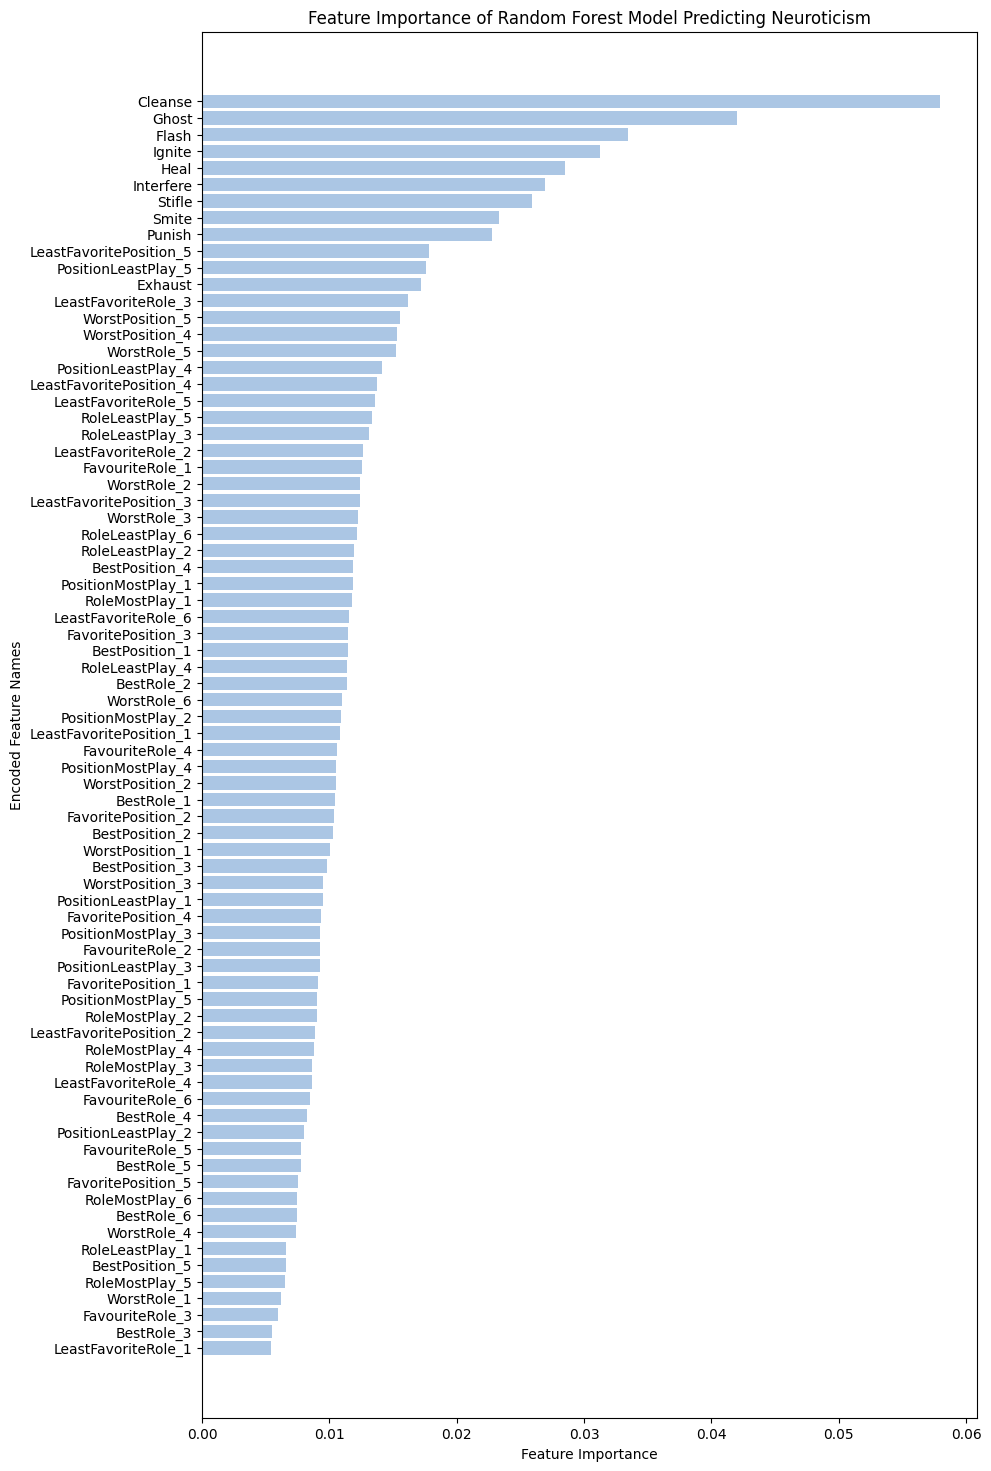

In [ ]:

feature_importance = best_rf.named_steps['randomforestclassifier'].feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10,18))




plt.figure(figsize=(10, 18))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#ABC6E4')
plt.xlabel('Feature Importance')
plt.ylabel('Encoded Feature Names')
plt.title('Feature Importance of Random Forest Model Predicting Neuroticism')
plt.show()


#### 4) KNN 
#### 10-fold gridsearch cv to fine tune hyperparameters

In [ ]:
knn = make_pipeline(KNeighborsClassifier())

knn_param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
                'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_gs = GridSearchCV(knn, knn_param_grid, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
knn_gs.fit(X_train, y_train)

print(f"best score: {knn_gs.best_score_}")
print(f"best params: {knn_gs.best_params_}")

Fitting 10 folds for each of 44 candidates, totalling 440 fits
best score: 0.646205025616574
best params: {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 3}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_knn = knn_gs.best_estimator_

cv_scores_knn = cross_val_score(best_knn, X_train, y_train, cv=10, scoring='f1_macro')
print(cv_scores_knn)
print(cv_scores_knn.mean())
print(cv_scores_knn.std()) 

[0.6347032  0.72482802 0.55406912 0.58201058 0.65800866 0.62019231
 0.73142302 0.64551282 0.67839114 0.63291139]
0.646205025616574
0.05311784878267531


#### hold-out method to evaluate the classification model

In [ ]:
best_knn.fit(X_train, y_train)
knn_pred = best_knn.predict(X_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63       132
           1       0.63      0.58      0.60       133

    accuracy                           0.62       265
   macro avg       0.62      0.62      0.61       265
weighted avg       0.62      0.62      0.61       265



#### 5) SVM 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
svm = make_pipeline( SVC(class_weight='balanced', random_state=42))

svm_param_grid={'svc__kernel': ['linear', 'rbf', 'poly','sigmoid'],
                'svc__C': [0.01, 0.1, 1.0, 10, 100]}

svm_gs = GridSearchCV(svm, svm_param_grid, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
svm_gs.fit(X_train, y_train)

print(f"best score: {svm_gs.best_score_}")
print(f"best params: {svm_gs.best_params_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
best score: 0.700595246011357
best params: {'svc__C': 100, 'svc__kernel': 'rbf'}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_svm = svm_gs.best_estimator_

cv_scores_svm = cross_val_score(best_svm, X_train, y_train, cv=10, scoring='f1_macro')
print(cv_scores_svm)
print(cv_scores_svm.mean())
print(cv_scores_svm.std()) 

[0.63607843 0.65       0.71245507 0.70886076 0.78467212 0.64505777
 0.73263497 0.66828165 0.74679487 0.72111682]
0.700595246011357
0.046594910722633553


#### hold-out method to evaluate the classification model

In [ ]:
best_svm.fit(X_train, y_train)
svm_pred = best_svm.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       132
           1       0.64      0.65      0.64       133

    accuracy                           0.64       265
   macro avg       0.64      0.64      0.64       265
weighted avg       0.64      0.64      0.64       265



### 2.2 Extraversion

#### 2.2.1 Split data

In [ ]:

y2 = data['Extraversion']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.25, stratify=y2, random_state=42, shuffle=True,)
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((793, 76), (265, 76), (793,), (265,))

#### 2.2.2 Baseline model

#### most_frequent

In [ ]:
dummy2 = DummyClassifier(strategy="most_frequent", random_state=42)
dummy2.fit(X_train2, y_train2)
accuracy2 = dummy2.score(X_train2, y_train2)
print(accuracy2)

y_pred2 = dummy2.predict(X_test2)
f1_2 = f1_score(y_test2, y_pred2, average='macro')
print(f1_2)

0.5006305170239597
0.33417085427135673


#### 2.2.3 Model performance comparison (evaluation metric: macro F1 score)

#### 1) LogisticRegression 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
lr2 = make_pipeline(LogisticRegression(class_weight='balanced', random_state=42))

lr_param_grid2={'logisticregression__C': [0.01, 0.1, 1.0, 10, 100],
               'logisticregression__solver': ['newton-cg', 'sag', 'saga','lbfgs']}

lr_gs2 = GridSearchCV(lr2, lr_param_grid2, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
lr_gs2.fit(X_train2, y_train2)

print(f"best score: {lr_gs2.best_score_}")
print(f"best params: {lr_gs2.best_params_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
best score: 0.6480104214804794
best params: {'logisticregression__C': 0.01, 'logisticregression__solver': 'newton-cg'}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_lr2 = lr_gs.best_estimator_

cv_scores_lr2 = cross_val_score(best_lr2, X_train2, y_train2, cv=10, scoring='f1_macro')
print(cv_scores_lr2)
print(cv_scores_lr2.mean())
print(cv_scores_lr2.std()) 

[0.68627451 0.61243944 0.66202472 0.63196787 0.67041078 0.59173127
 0.62019231 0.55439162 0.64414414 0.56899872]
0.6242575384224662
0.041238876205478156


#### hold-out method to evaluate the classification model

In [ ]:
best_lr2.fit(X_train2, y_train2)
lr2_pred = best_lr2.predict(X_test2)
print(classification_report(y_test2, lr2_pred))

              precision    recall  f1-score   support

           0       0.65      0.66      0.65       132
           1       0.66      0.65      0.65       133

    accuracy                           0.65       265
   macro avg       0.65      0.65      0.65       265
weighted avg       0.65      0.65      0.65       265



#### 2) DecisionTree 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
dt2 = make_pipeline( DecisionTreeClassifier(class_weight='balanced', random_state=42))

dt_param_grid2={'decisiontreeclassifier__criterion': ['gini', 'entropy', 'log_loss'],
               'decisiontreeclassifier__max_depth': [20, 30, 40, 50, 60, 70, 80, 90, 100]}

dt_gs2 = GridSearchCV(dt2, dt_param_grid2, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
dt_gs2.fit(X_train2, y_train2)

print(f"best score: {dt_gs2.best_score_}")
print(f"best params: {dt_gs2.best_params_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
best score: 0.5811231534450274
best params: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 30}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_dt2 = dt_gs.best_estimator_

cv_scores_dt2 = cross_val_score(best_dt2, X_train2, y_train2, cv=10, scoring='f1_macro')
print(cv_scores_dt2)
print(cv_scores_dt2.mean())
print(cv_scores_dt2.std()) 

[0.54971857 0.5869191  0.57393484 0.51891026 0.53831169 0.62019231
 0.50346495 0.58120482 0.67041078 0.60658635]
0.5749653663943914
0.047511527653532136


#### hold-out method to evaluate the classification model

In [ ]:
best_dt2.fit(X_train2, y_train2)
dt2_pred = best_dt2.predict(X_test2)
print(classification_report(y_test2, dt2_pred))

              precision    recall  f1-score   support

           0       0.58      0.61      0.59       132
           1       0.59      0.56      0.58       133

    accuracy                           0.58       265
   macro avg       0.59      0.58      0.58       265
weighted avg       0.59      0.58      0.58       265



#### 3) RandomForest 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
rf2 = make_pipeline(RandomForestClassifier(class_weight='balanced', random_state=42))

rf_param_grid2={'randomforestclassifier__n_estimators': [150, 300, 500],
               'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],
               'randomforestclassifier__max_depth': [30, 40, 50]}

rf_gs2 = GridSearchCV(rf2, rf_param_grid2, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
rf_gs2.fit(X_train2, y_train2)

print(f"best score: {rf_gs2.best_score_}")
print(f"best params: {rf_gs2.best_params_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
best score: 0.640425419947015
best params: {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 30, 'randomforestclassifier__n_estimators': 150}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_rf2 = rf_gs.best_estimator_ 

cv_scores_rf2 = cross_val_score(best_rf2, X_train2, y_train2, cv=10, scoring='f1_macro')
print(cv_scores_rf2)
print(cv_scores_rf2.mean())
print(cv_scores_rf2.std()) 

[0.67479675 0.56243163 0.72222222 0.5523717  0.69615385 0.61724806
 0.57985496 0.64414414 0.59487179 0.68334135]
0.6327436454479295
0.05688661032607914


#### hold-out method to evaluate the classification model

In [ ]:
best_rf2.fit(X_train2, y_train2)
rf2_pred = best_rf2.predict(X_test2)
print(classification_report(y_test2, rf2_pred))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67       132
           1       0.68      0.63      0.65       133

    accuracy                           0.66       265
   macro avg       0.66      0.66      0.66       265
weighted avg       0.66      0.66      0.66       265



#### 4) KNN 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
knn2 = make_pipeline(KNeighborsClassifier())

knn_param_grid2={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
                'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_gs2 = GridSearchCV(knn2, knn_param_grid2, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
knn_gs2.fit(X_train2, y_train2)

print(f"best score: {knn_gs2.best_score_}")
print(f"best params: {knn_gs2.best_params_}")

Fitting 10 folds for each of 44 candidates, totalling 440 fits
best score: 0.6219286455694899
best params: {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 20}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_knn2 = knn_gs.best_estimator_

cv_scores_knn2 = cross_val_score(best_knn2, X_train2, y_train2, cv=10, scoring='f1_macro')
print(cv_scores_knn2)
print(cv_scores_knn2.mean())
print(cv_scores_knn2.std()) 

[0.61243944 0.61243944 0.63698952 0.50947712 0.55667789 0.55696203
 0.47256147 0.6817083  0.58120482 0.57241266]
0.5792872696417639
0.057742653275214294


#### hold-out method to evaluate the classification model

In [ ]:
best_knn2.fit(X_train2, y_train2)
knn2_pred = best_knn2.predict(X_test2)
print(classification_report(y_test2, knn2_pred))

              precision    recall  f1-score   support

           0       0.59      0.62      0.60       132
           1       0.60      0.56      0.58       133

    accuracy                           0.59       265
   macro avg       0.59      0.59      0.59       265
weighted avg       0.59      0.59      0.59       265



#### 5) SVM 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
svm2 = make_pipeline(SVC(class_weight='balanced', random_state=42))

svm_param_grid2={'svc__kernel': ['linear', 'rbf', 'poly','sigmoid'],
                'svc__C': [0.01, 0.1, 1.0, 10, 100]}

svm_gs2 = GridSearchCV(svm2, svm_param_grid2, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
svm_gs2.fit(X_train2, y_train2)

print(f"best score: {svm_gs2.best_score_}")
print(f"best params: {svm_gs2.best_params_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
best score: 0.6427006213137127
best params: {'svc__C': 0.01, 'svc__kernel': 'linear'}


#### 10-fold CV to make sure the model is not overfitting

In [ ]:
best_svm2 = svm_gs2.best_estimator_

cv_scores_svm2 = cross_val_score(best_svm2, X_train2, y_train2, cv=10, scoring='f1_macro')
print(cv_scores_svm2)
print(cv_scores_svm2.mean())
print(cv_scores_svm2.std()) 

[0.725      0.57393484 0.68349422 0.63196787 0.6573494  0.62910798
 0.64414414 0.57985496 0.64414414 0.65800866]
0.6427006213137127
0.0422713359566266


#### hold-out method to evaluate the classification model

In [ ]:
best_svm2.fit(X_train2, y_train2)
svm2_pred = best_svm2.predict(X_test2)
print(classification_report(y_test2, svm2_pred))

              precision    recall  f1-score   support

           0       0.63      0.73      0.68       132
           1       0.68      0.57      0.62       133

    accuracy                           0.65       265
   macro avg       0.66      0.65      0.65       265
weighted avg       0.66      0.65      0.65       265



In [ ]:
print(best_svm2.fit)

<bound method Pipeline.fit of Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('svc', SVC(class_weight='balanced', random_state=42))])>


#### feature importance


In [ ]:

results = permutation_importance(best_svm2, X_test2, y_test2, n_repeats=30, random_state=42)

importance_df = pd.DataFrame({
    'Feature': X_test2.columns,  
    'Importance': results.importances_mean
}).sort_values(by='Importance', ascending=False)


print(importance_df)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='#ABC6E4')

plt.xlabel('Feature Importance')
plt.ylabel('Encoded Feature Names')
plt.title('Feature Importance of SVM Model Predicting Extraversion')
plt.gca().invert_yaxis()  
plt.show()

### 2.3 Openness

#### 2.3.1 Split data

In [ ]:
X3 = data[['FavouriteRole', 'LeastFavoriteRole', 'RoleMostPlay', 'RoleLeastPlay', 'BestRole','WorstRole',
  'FavoritePosition', 'LeastFavoritePosition', 'BestPosition','WorstPosition','PositionMostPlay','PositionLeastPlay', 
 'Punish','Ignite', 'Smite', 'Ghost', 'Heal', 'Interfere', 'Stifle', 'Cleanse', 'Exhaust' ,'Flash']]

y3 = data['Openness']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, stratify=y3, random_state=42, shuffle=True,)
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

((793, 22), (265, 22), (793,), (265,))

#### 2.3.2 Baseline model

In [ ]:
dummy3 = DummyClassifier(strategy="most_frequent", random_state=42)
dummy3.fit(X_train3, y_train3)
accuracy3 = dummy3.score(X_train3, y_train3)
print(accuracy3)

y_pred3 = dummy3.predict(X_test3)
f1_3 = f1_score(y_test3, y_pred3, average='macro')
print(f1_3)

0.544766708701135
0.35365853658536583


#### 2.3.3 Model performance comparison (evaluation metric: macro F1 score)

#### 1) LogisticRegression 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
lr3 = make_pipeline(LogisticRegression(class_weight='balanced', random_state=42))

lr_param_grid3={'logisticregression__C': [0.01, 0.1, 1.0, 10, 100],
               'logisticregression__solver': ['newton-cg', 'sag', 'saga','lbfgs']}

lr_gs3 = GridSearchCV(lr3, lr_param_grid3, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
lr_gs3.fit(X_train3, y_train3)

print(f"best score: {lr_gs3.best_score_}")
print(f"best params: {lr_gs3.best_params_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
best score: 0.6296204193486645
best params: {'logisticregression__C': 0.01, 'logisticregression__solver': 'sag'}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_lr3 = lr_gs.best_estimator_

cv_scores_lr3 = cross_val_score(best_lr3, X_train3, y_train3, cv=10, scoring='f1_macro')
print(cv_scores_lr3)
print(cv_scores_lr3.mean())
print(cv_scores_lr3.std())

[0.67418546 0.72344437 0.67479675 0.56899872 0.56899872 0.59487179
 0.6835443  0.59435173 0.61970475 0.59330759]
0.6296204193486645
0.051919104843118125


#### hold-out method for final classification perfomrnace evaluation 

In [ ]:
best_lr3.fit(X_train3, y_train3)
lr_pred3 = best_lr3.predict(X_test3)
print(classification_report(y_test3, lr_pred3))

              precision    recall  f1-score   support

        high       0.74      0.59      0.66       145
         low       0.60      0.74      0.66       120

    accuracy                           0.66       265
   macro avg       0.67      0.67      0.66       265
weighted avg       0.67      0.66      0.66       265



#### 2) DecisionTree 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
dt3 = make_pipeline( DecisionTreeClassifier(class_weight='balanced', random_state=42))

dt_param_grid3={'decisiontreeclassifier__criterion': ['gini', 'entropy', 'log_loss'],
               'decisiontreeclassifier__max_depth': [20, 30, 40, 50, 60, 70, 80, 90, 100]}

dt_gs3 = GridSearchCV(dt3, dt_param_grid3, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
dt_gs3.fit(X_train3, y_train3)

print(f"best score: {dt_gs3.best_score_}")
print(f"best params: {dt_gs3.best_params_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
best score: 0.5888052130012902
best params: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 20}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_dt3 = dt_gs.best_estimator_

cv_scores_dt3 = cross_val_score(best_dt3, X_train3, y_train3, cv=10, scoring='f1_macro')
print(cv_scores_dt3)
print(cv_scores_dt3.mean())
print(cv_scores_dt3.std())

[0.63698952 0.56157318 0.70881469 0.71785714 0.62910798 0.53529412
 0.52892828 0.52679294 0.5523717  0.49032258]
0.5888052130012902
0.0755412030278227


#### hold-out method for final classification perfomrnace evaluation 

In [ ]:
best_dt3.fit(X_train3, y_train3)
dt_pred3 = best_dt3.predict(X_test3)
print(classification_report(y_test3, dt_pred3))

              precision    recall  f1-score   support

        high       0.66      0.59      0.62       145
         low       0.56      0.63      0.59       120

    accuracy                           0.61       265
   macro avg       0.61      0.61      0.61       265
weighted avg       0.61      0.61      0.61       265



#### 3) RandomForest 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
rf3 = make_pipeline(RandomForestClassifier(class_weight='balanced', random_state=42))

rf_param_grid3={'randomforestclassifier__n_estimators': [150, 300, 500],
               'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],
               'randomforestclassifier__max_depth': [30, 40, 50]}

rf_gs3 = GridSearchCV(rf3, rf_param_grid3, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
rf_gs3.fit(X_train3, y_train3)

print(f"best score: {rf_gs3.best_score_}")
print(f"best params: {rf_gs3.best_params_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
best score: 0.6656009061964318
best params: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 30, 'randomforestclassifier__n_estimators': 500}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_rf3 = rf_gs.best_estimator_

cv_scores_rf3 = cross_val_score(best_rf3, X_train3, y_train3, cv=10, scoring='f1_macro')
print(cv_scores_rf3)
print(cv_scores_rf3.mean())
print(cv_scores_rf3.std())

[0.69052224 0.66881934 0.78173648 0.69640769 0.70584426 0.68774704
 0.63570487 0.55667789 0.58610782 0.52662215]
0.6536189789481268
0.0735761597957294


#### hold-out method for final classification perfomrnace evaluation 

In [ ]:
best_rf3.fit(X_train3, y_train3)
rf_pred3 = best_rf3.predict(X_test3)
print(classification_report(y_test3, rf_pred3))

              precision    recall  f1-score   support

        high       0.70      0.69      0.69       145
         low       0.63      0.64      0.64       120

    accuracy                           0.67       265
   macro avg       0.67      0.67      0.67       265
weighted avg       0.67      0.67      0.67       265



#### 4) KNN 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
knn3 = make_pipeline( KNeighborsClassifier())

knn_param_grid3={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
                'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_gs3 = GridSearchCV(knn3, knn_param_grid3, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
knn_gs3.fit(X_train3, y_train3)

print(f"best score: {knn_gs3.best_score_}")
print(f"best params: {knn_gs3.best_params_}")

Fitting 10 folds for each of 44 candidates, totalling 440 fits
best score: 0.6389878421816557
best params: {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 10}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_knn3 = knn_gs.best_estimator_

cv_scores_knn3 = cross_val_score(best_knn3, X_train3, y_train3, cv=10, scoring='f1_macro')
print(cv_scores_knn3)
print(cv_scores_knn3.mean())
print(cv_scores_knn3.std())

[0.70695971 0.60753284 0.74210187 0.66655844 0.63856209 0.58961039
 0.58961039 0.50601251 0.60531829 0.57547631]
0.6227742830981096
0.0648842647102335


#### hold-out method for final classification perfomrnace evaluation 

In [ ]:
best_knn3.fit(X_train3, y_train3)
knn_pred3 = best_knn3.predict(X_test3)
print(classification_report(y_test3, knn_pred3))

              precision    recall  f1-score   support

        high       0.64      0.67      0.65       145
         low       0.58      0.54      0.56       120

    accuracy                           0.61       265
   macro avg       0.61      0.61      0.61       265
weighted avg       0.61      0.61      0.61       265



#### 5) SVM 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
svm3 = make_pipeline(SVC(class_weight='balanced', random_state=42))

svm_param_grid3={'svc__kernel': ['linear', 'rbf', 'poly','sigmoid'],
                'svc__C': [0.01, 0.1, 1.0, 10, 100]}

svm_gs3 = GridSearchCV(svm3, svm_param_grid3, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
svm_gs3.fit(X_train3, y_train3)

print(f"best score: {svm_gs3.best_score_}")
print(f"best params: {svm_gs3.best_params_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
best score: 0.6532615659147388
best params: {'svc__C': 1.0, 'svc__kernel': 'rbf'}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_svm3 = svm_gs.best_estimator_

cv_scores_svm3 = cross_val_score(best_svm3, X_train3, y_train3, cv=10, scoring='f1_macro')
print(cv_scores_svm3)
print(cv_scores_svm3.mean())
print(cv_scores_svm3.std())

[0.74424552 0.68147794 0.77142857 0.58366271 0.55439162 0.64090909
 0.65800866 0.56788932 0.65015581 0.54649828]
0.6398667530815361
0.07398265116908548


#### hold-out method for final classification perfomrnace evaluation 

In [ ]:
best_svm3.fit(X_train3, y_train3)
svm_pred3 = best_svm3.predict(X_test3)
print(classification_report(y_test3, svm_pred3))

              precision    recall  f1-score   support

        high       0.72      0.70      0.71       145
         low       0.65      0.67      0.66       120

    accuracy                           0.69       265
   macro avg       0.68      0.69      0.68       265
weighted avg       0.69      0.69      0.69       265



#### feature importance

                  Feature  Importance
19                Cleanse    0.034591
21                  Flash    0.010943
13                 Ignite    0.009434
9           WorstPosition    0.008050
3           RoleLeastPlay    0.006164
16                   Heal    0.005535
4                BestRole    0.002642
0           FavouriteRole    0.001761
8            BestPosition    0.000629
1       LeastFavoriteRole   -0.000377
7   LeastFavoritePosition   -0.001132
5               WorstRole   -0.001258
17              Interfere   -0.002642
10       PositionMostPlay   -0.003648
14                  Smite   -0.005660
11      PositionLeastPlay   -0.006164
12                 Punish   -0.006415
2            RoleMostPlay   -0.006667
20                Exhaust   -0.007044
6        FavoritePosition   -0.009434
18                 Stifle   -0.013836
15                  Ghost   -0.014717


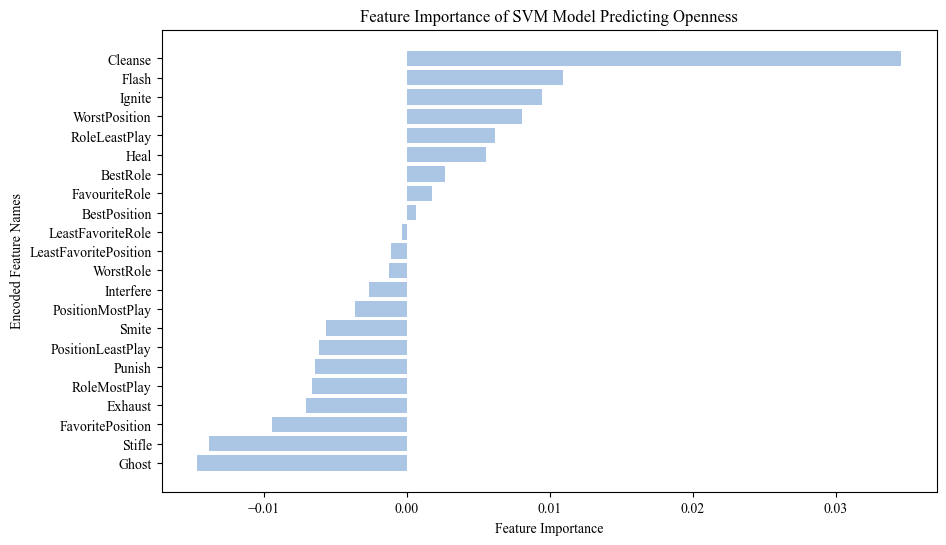

In [ ]:

results = permutation_importance(best_svm3, X_test3, y_test3, n_repeats=30, random_state=42)

importance_df = pd.DataFrame({
    'Feature': X_test3.columns,  
    'Importance': results.importances_mean
}).sort_values(by='Importance', ascending=False)


print(importance_df)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='#ABC6E4')

plt.xlabel('Feature Importance')
plt.ylabel('Encoded Feature Names')
plt.title('Feature Importance of SVM Model Predicting Openness')
plt.gca().invert_yaxis()  
plt.show()

### 2.4 Agreeableness

#### 2.4.1 Split data

In [ ]:
X4 = data[['FavouriteRole', 'LeastFavoriteRole', 'RoleMostPlay', 'RoleLeastPlay', 'BestRole','WorstRole',
  'FavoritePosition', 'LeastFavoritePosition', 'BestPosition','WorstPosition','PositionMostPlay','PositionLeastPlay', 
'Punish','Ignite', 'Smite', 'Ghost', 'Heal', 'Interfere', 'Stifle', 'Cleanse', 'Exhaust' ,'Flash']]
y4 = data['Agreeableness']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25, stratify=y4, random_state=42, shuffle=True,)
X_train4.shape, X_test4.shape, y_train4.shape, y_test4.shape

((793, 22), (265, 22), (793,), (265,))

#### 2.4.2 Baseline model

In [ ]:
dummy4 = DummyClassifier(strategy="most_frequent", random_state=42)
dummy4.fit(X_train4, y_train4)
accuracy4 = dummy4.score(X_train4, y_train4)
print(accuracy4)

y_pred4 = dummy4.predict(X_test4)
f1_4 = f1_score(y_test4, y_pred4, average='macro')
print(f1_4)

0.5523329129886507
0.35523114355231145


#### 2.4.3 Model performance comparison (evaluation metric: macro F1 score)

#### 1) LogisticRegression 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
lr4 = make_pipeline(LogisticRegression(class_weight='balanced', random_state=42))

lr_param_grid4={'logisticregression__C': [0.01, 0.1, 1.0, 10, 100],
               'logisticregression__solver': ['newton-cg', 'sag', 'saga','lbfgs']}

lr_gs4 = GridSearchCV(lr4, lr_param_grid4, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
lr_gs4.fit(X_train4, y_train4)

print(f"best score: {lr_gs4.best_score_}")
print(f"best params: {lr_gs4.best_params_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
best score: 0.585553701103714
best params: {'logisticregression__C': 100, 'logisticregression__solver': 'sag'}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_lr4 = lr_gs.best_estimator_

cv_scores_lr4 = cross_val_score(best_lr4, X_train4, y_train4, cv=10, scoring='f1_macro')
print(cv_scores_lr4)
print(cv_scores_lr4.mean())
print(cv_scores_lr4.std())

[0.53684869 0.58588235 0.55689191 0.64551282 0.58201058 0.5436457
 0.60734327 0.58120482 0.46136364 0.5523717 ]
0.5653075492955979
0.04634281287682346


#### hold-out method to evaluate the classification performance

In [ ]:
best_lr4.fit(X_train4,y_train4)
lr_pred4 = best_lr4.predict(X_test4)
print(classification_report(y_test4, lr_pred4))

              precision    recall  f1-score   support

        high       0.62      0.56      0.59       146
         low       0.52      0.58      0.55       119

    accuracy                           0.57       265
   macro avg       0.57      0.57      0.57       265
weighted avg       0.58      0.57      0.57       265



#### 2) DecisionTree 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
dt4 = make_pipeline(DecisionTreeClassifier(class_weight='balanced', random_state=42))

dt_param_grid4={'decisiontreeclassifier__criterion': ['gini', 'entropy', 'log_loss'],
               'decisiontreeclassifier__max_depth': [20, 30, 40, 50, 60, 70, 80, 90, 100]}

dt_gs4 = GridSearchCV(dt4, dt_param_grid4, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
dt_gs4.fit(X_train4, y_train4)

print(f"best score: {dt_gs4.best_score_}")
print(f"best params: {dt_gs4.best_params_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
best score: 0.5778293097886525
best params: {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 20}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_dt4 = dt_gs.best_estimator_

cv_scores_dt4 = cross_val_score(best_dt4, X_train4, y_train4, cv=10, scoring='f1_macro')
print(cv_scores_dt4)
print(cv_scores_dt4.mean())
print(cv_scores_dt4.std())

[0.51058824 0.55689191 0.52231301 0.62424143 0.59435173 0.62693372
 0.57985496 0.64090909 0.52726064 0.55764163]
0.5740986365224849
0.04437209780556292


#### hold-out method to evaluate the classification performance

In [ ]:
best_dt4.fit(X_train4,y_train4)
dt_pred4 = best_dt4.predict(X_test4)
print(classification_report(y_test4, dt_pred4))

              precision    recall  f1-score   support

        high       0.60      0.61      0.61       146
         low       0.51      0.50      0.51       119

    accuracy                           0.56       265
   macro avg       0.56      0.56      0.56       265
weighted avg       0.56      0.56      0.56       265



#### 3) RandomForest 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
rf4 = make_pipeline(RandomForestClassifier(class_weight='balanced', random_state=42))

rf_param_grid4={'randomforestclassifier__n_estimators': [150, 300, 500],
               'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],
               'randomforestclassifier__max_depth': [30, 40, 50]}

rf_gs4 = GridSearchCV(rf4, rf_param_grid4, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
rf_gs4.fit(X_train4, y_train4)

print(f"best score: {rf_gs4.best_score_}")
print(f"best params: {rf_gs4.best_params_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
best score: 0.5604423597654546
best params: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 30, 'randomforestclassifier__n_estimators': 150}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_rf4 = rf_gs.best_estimator_

cv_scores_rf4 = cross_val_score(best_rf4, X_train4, y_train4, cv=10, scoring='f1_macro')
print(cv_scores_rf4)
print(cv_scores_rf4.mean())
print(cv_scores_rf4.std())

[0.45841393 0.61636829 0.62666667 0.63231383 0.52679294 0.5594051
 0.58961039 0.56441103 0.44677871 0.58366271]
0.5604423597654546
0.062086367930318465


#### hold-out method to evaluate the classification performance

In [ ]:
best_rf4.fit(X_train4,y_train4)
rf_pred4 = best_rf4.predict(X_test4)
print(classification_report(y_test4, rf_pred4))

              precision    recall  f1-score   support

        high       0.63      0.75      0.69       146
         low       0.60      0.45      0.52       119

    accuracy                           0.62       265
   macro avg       0.61      0.60      0.60       265
weighted avg       0.62      0.62      0.61       265



#### Feature importance

In [ ]:
print(best_rf4)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=30,
                                        n_estimators=150, random_state=42))])


In [ ]:
ture_importance = best_rf4.named_steps['randomforestclassifier'].feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10,18))




plt.figure(figsize=(10, 18))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#ABC6E4')
plt.xlabel('Feature Importance')
plt.ylabel('Encoded Feature Names')
plt.title('Feature Importance of Random Forest Model Predicting Agreeableness')
plt.show()

ValueError: All arrays must be of the same length

#### 4) KNN 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
knn4 = make_pipeline(KNeighborsClassifier())

knn_param_grid4={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
                'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_gs4 = GridSearchCV(knn4, knn_param_grid4, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
knn_gs4.fit(X_train4, y_train4)

print(f"best score: {knn_gs4.best_score_}")
print(f"best params: {knn_gs4.best_params_}")

Fitting 10 folds for each of 44 candidates, totalling 440 fits
best score: 0.5738811812967972
best params: {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 1}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_knn4 = knn_gs.best_estimator_

cv_scores_knn4 = cross_val_score(best_knn4, X_train4, y_train4, cv=10, scoring='f1_macro')
print(cv_scores_knn4)
print(cv_scores_knn4.mean())
print(cv_scores_knn4.std())

[0.47333772 0.56825397 0.55729167 0.63570487 0.46136364 0.53529412
 0.6127451  0.54259719 0.5594051  0.66655844]
0.561255181724623
0.06170960880088004


#### hold-out method to evaluate the classification performance

In [ ]:
best_knn4.fit(X_train4,y_train4)
knn_pred4 = best_knn4.predict(X_test4)
print(classification_report(y_test4, knn_pred4))

              precision    recall  f1-score   support

        high       0.61      0.66      0.64       146
         low       0.54      0.49      0.51       119

    accuracy                           0.58       265
   macro avg       0.58      0.58      0.58       265
weighted avg       0.58      0.58      0.58       265



#### 5) SVM 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
svm4 = make_pipeline( SVC(class_weight='balanced', random_state=42))

svm_param_grid4={'svc__kernel': ['linear', 'rbf', 'poly','sigmoid'],
                'svc__C': [0.01, 0.1, 1.0, 10, 100]}

svm_gs4 = GridSearchCV(svm4, svm_param_grid4, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
svm_gs4.fit(X_train4, y_train4)

print(f"best score: {svm_gs4.best_score_}")
print(f"best params: {svm_gs4.best_params_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
best score: 0.5851455692734888
best params: {'svc__C': 0.1, 'svc__kernel': 'rbf'}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_svm4 = svm_gs.best_estimator_

cv_scores_svm4 = cross_val_score(best_svm4, X_train4, y_train4, cv=10, scoring='f1_macro')
print(cv_scores_svm4)
print(cv_scores_svm4.mean())
print(cv_scores_svm4.std())

[0.51242382 0.62476548 0.62406015 0.65822785 0.57985496 0.5436457
 0.59173127 0.61970475 0.49293967 0.54069767]
0.5788051304904618
0.05174652168842671


#### hold-out method to evaluate the classification performance

In [ ]:
best_svm4.fit(X_train4,y_train4)
svm_pred4 = best_svm4.predict(X_test4)
print(classification_report(y_test4, svm_pred4))

              precision    recall  f1-score   support

        high       0.66      0.52      0.58       146
         low       0.53      0.66      0.59       119

    accuracy                           0.58       265
   macro avg       0.59      0.59      0.58       265
weighted avg       0.60      0.58      0.58       265



### 2.5 Conscientiousness

#### 2.5.1 Split data

In [ ]:
X5 = data[['FavouriteRole', 'LeastFavoriteRole', 'RoleMostPlay', 'RoleLeastPlay', 'BestRole','WorstRole',
  'FavoritePosition', 'LeastFavoritePosition', 'BestPosition','WorstPosition','PositionMostPlay','PositionLeastPlay', 
 'Punish','Ignite', 'Smite', 'Ghost', 'Heal', 'Interfere', 'Stifle', 'Cleanse', 'Exhaust' ,'Flash']]
y5 = data['Conscientiousness']

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.25, stratify=y5, random_state=42, shuffle=True,)
X_train5.shape, X_test5.shape, y_train5.shape, y_test5.shape

((793, 22), (265, 22), (793,), (265,))

#### 2.5.2 Baseline model

In [ ]:
dummy5 = DummyClassifier(strategy="most_frequent", random_state=42)
dummy5.fit(X_train5, y_train5)
accuracy5 = dummy5.score(X_train5, y_train5)
print(accuracy5)

y_pred5 = dummy5.predict(X_test5)
f1_5 = f1_score(y_test5, y_pred5, average='macro')
print(f1_5)

0.5044136191677175
0.33583959899749377


#### 2.5.3 Model performance comparison (evaluation metric: macro F1 score)

#### 1) LogisticRegression 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
lr5 = make_pipeline(LogisticRegression(class_weight='balanced', random_state=42))

lr_param_grid5={'logisticregression__C': [0.01, 0.1, 1.0, 10, 100],
               'logisticregression__solver': ['newton-cg', 'sag', 'saga','lbfgs']}

lr_gs5 = GridSearchCV(lr5, lr_param_grid5, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
lr_gs5.fit(X_train5, y_train5)

print(f"best score: {lr_gs5.best_score_}")
print(f"best params: {lr_gs5.best_params_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits


best score: 0.6869485752119069
best params: {'logisticregression__C': 0.1, 'logisticregression__solver': 'sag'}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_lr5 = lr_gs.best_estimator_

cv_scores_lr5 = cross_val_score(best_lr5, X_train5, y_train5, cv=10, scoring='f1_macro')
print(cv_scores_lr5)
print(cv_scores_lr5.mean())
print(cv_scores_lr5.std())

[0.62476548 0.625      0.68705993 0.64551282 0.77211538 0.63196787
 0.73263497 0.6957638  0.74679487 0.6573494 ]
0.681896452398738
0.05105386074319661


##### hold-out method to evaluate the classification performance

In [ ]:
best_lr5.fit(X_train5,y_train5)
lr_pred5 = best_lr5.predict(X_test5)
print(classification_report(y_test5, lr_pred5))

              precision    recall  f1-score   support

        high       0.71      0.66      0.68       134
         low       0.67      0.73      0.70       131

    accuracy                           0.69       265
   macro avg       0.69      0.69      0.69       265
weighted avg       0.69      0.69      0.69       265



#### feature importance

                Feature  Importance
80            Cleanse_0    0.209619
68             Ignite_0    0.144587
78             Stifle_0    0.131851
72              Ghost_0    0.104659
84              Flash_0    0.102052
..                  ...         ...
73              Ghost_1   -0.110875
65  PositionLeastPlay_5   -0.127751
79             Stifle_1   -0.138067
69             Ignite_1   -0.150802
81            Cleanse_1   -0.215834

[86 rows x 2 columns]


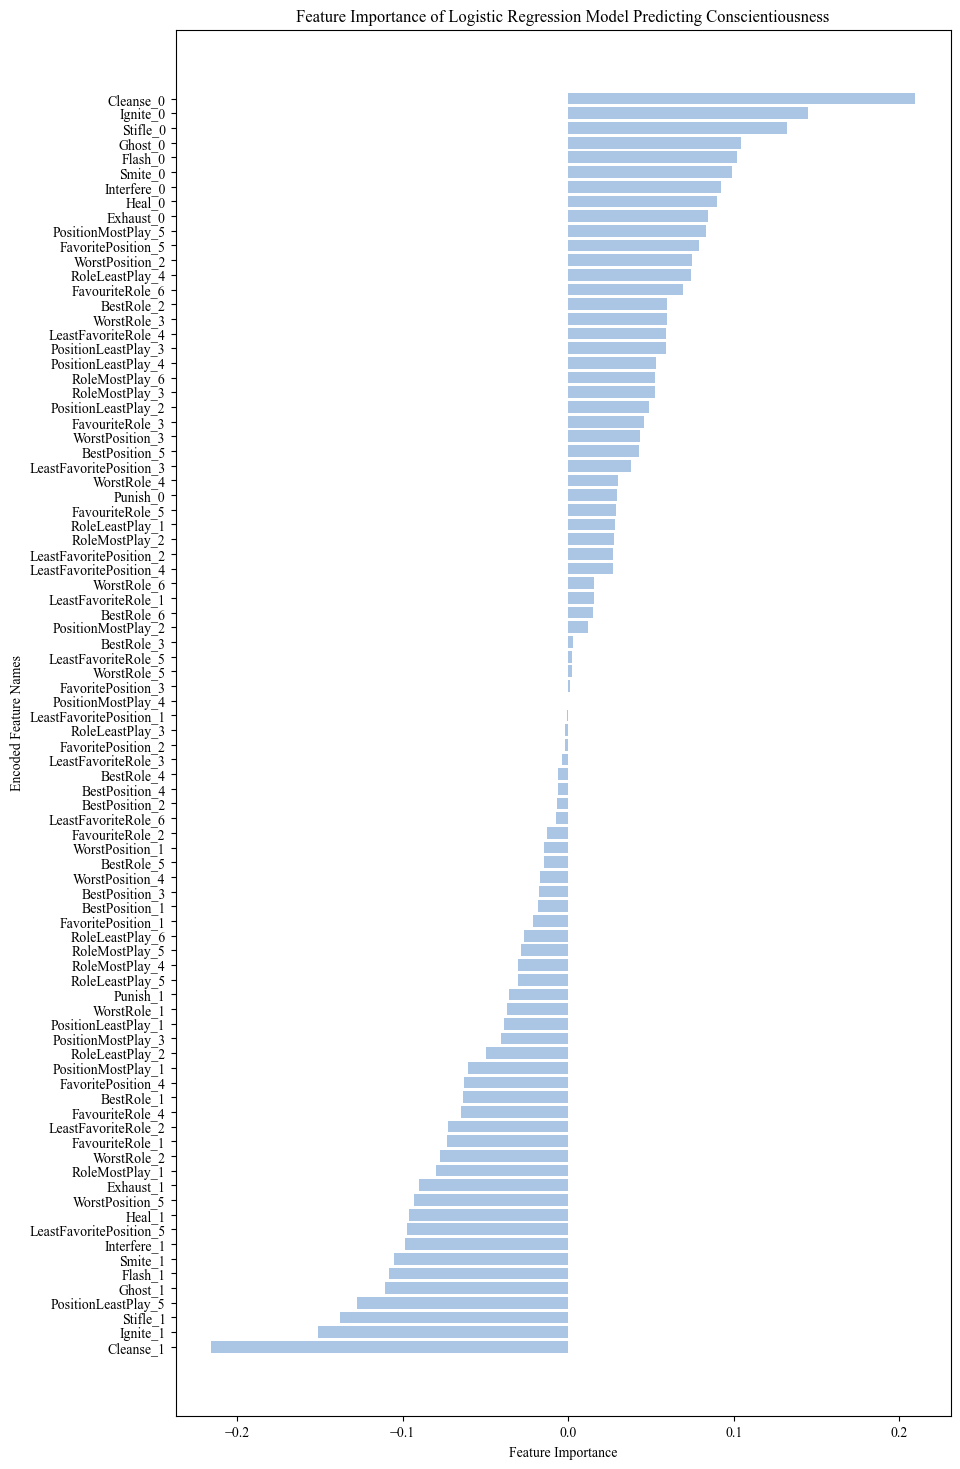

In [ ]:
logistic_model = best_lr5.named_steps['logisticregression']

feature_importance_df = pd.DataFrame({
    'Feature': X_train5.columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)


plt.figure(figsize=(10, 18))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='#ABC6E4')
plt.xlabel('Feature Importance')
plt.ylabel('Encoded Feature Names')
plt.title('Feature Importance of Logistic Regression Model Predicting Conscientiousness')
plt.gca().invert_yaxis()  
plt.show()


#### 2) DecisionTree 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
dt5 = make_pipeline(DecisionTreeClassifier(class_weight='balanced', random_state=42))

dt_param_grid5={'decisiontreeclassifier__criterion': ['gini', 'entropy', 'log_loss'],
               'decisiontreeclassifier__max_depth': [20, 30, 40, 50, 60, 70, 80, 90, 100]}

dt_gs5 = GridSearchCV(dt5, dt_param_grid5, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
dt_gs5.fit(X_train5, y_train5)

print(f"best score: {dt_gs5.best_score_}")
print(f"best params: {dt_gs5.best_params_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
best score: 0.6052335240441561
best params: {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 30}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_dt5 = dt_gs.best_estimator_

cv_scores_dt5 = cross_val_score(best_dt5, X_train5, y_train5, cv=10, scoring='f1_macro')
print(cv_scores_dt5)
print(cv_scores_dt5.mean())
print(cv_scores_dt5.std())

[0.675      0.58736299 0.59899749 0.61872587 0.52892828 0.49293967
 0.58227848 0.73417722 0.58120482 0.59435173]
0.5993966552430161
0.06430284588669317


##### hold-out method to evaluate the classification performance

In [ ]:
best_dt5.fit(X_train5,y_train5)
dt_pred5 = best_dt5.predict(X_test5)
print(classification_report(y_test5, dt_pred5))

              precision    recall  f1-score   support

        high       0.63      0.61      0.62       134
         low       0.61      0.63      0.62       131

    accuracy                           0.62       265
   macro avg       0.62      0.62      0.62       265
weighted avg       0.62      0.62      0.62       265



#### 3) RandomForest 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
rf5 = make_pipeline(RandomForestClassifier(class_weight='balanced', random_state=42))

rf_param_grid5={'randomforestclassifier__n_estimators': [150, 300, 500],
               'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],
               'randomforestclassifier__max_depth': [30, 40, 50]}

rf_gs5 = GridSearchCV(rf5, rf_param_grid5, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
rf_gs5.fit(X_train5, y_train5)

print(f"best score: {rf_gs5.best_score_}")
print(f"best params: {rf_gs5.best_params_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
best score: 0.6914629803370398
best params: {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 30, 'randomforestclassifier__n_estimators': 500}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_rf5 = rf_gs.best_estimator_

cv_scores_rf5 = cross_val_score(best_rf5, X_train5, y_train5, cv=10, scoring='f1_macro')
print(cv_scores_rf5)
print(cv_scores_rf5.mean())
print(cv_scores_rf5.std())

[0.63698952 0.64646465 0.67479675 0.70811245 0.65800866 0.70411985
 0.57547631 0.73400673 0.72039897 0.75949367]
0.6817867551017041
0.05159323301616622


##### hold-out method to evaluate the classification performance

In [ ]:
best_rf5.fit(X_train5,y_train5)
rf_pred5 = best_rf5.predict(X_test5)
print(classification_report(y_test5, rf_pred5))

              precision    recall  f1-score   support

        high       0.65      0.72      0.68       134
         low       0.68      0.61      0.64       131

    accuracy                           0.66       265
   macro avg       0.67      0.66      0.66       265
weighted avg       0.67      0.66      0.66       265



#### 4) KNN 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [ ]:
knn5 = make_pipeline(KNeighborsClassifier())

knn_param_grid5={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
                'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_gs5 = GridSearchCV(knn5, knn_param_grid5, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
knn_gs5.fit(X_train5, y_train5)

print(f"best score: {knn_gs5.best_score_}")
print(f"best params: {knn_gs5.best_params_}")

Fitting 10 folds for each of 44 candidates, totalling 440 fits
best score: 0.6541236863032398
best params: {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 7}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_knn5 = knn_gs.best_estimator_

cv_scores_knn5 = cross_val_score(best_knn5, X_train5, y_train5, cv=10, scoring='f1_macro')
print(cv_scores_knn5)
print(cv_scores_knn5.mean())
print(cv_scores_knn5.std())

[0.53568627 0.59974984 0.62287869 0.70867404 0.72111682 0.6957638
 0.59435173 0.62019231 0.69379845 0.68334135]
0.6475553309293922
0.05820503019046084


##### hold-out method to evaluate the classification performance

In [ ]:
best_knn5.fit(X_train5,y_train5)
knn_pred5 = best_knn5.predict(X_test5)
print(classification_report(y_test5, knn_pred5))

              precision    recall  f1-score   support

        high       0.64      0.67      0.66       134
         low       0.65      0.62      0.63       131

    accuracy                           0.65       265
   macro avg       0.65      0.64      0.64       265
weighted avg       0.65      0.65      0.65       265



#### 5) SVM 
#### 10-fold gridsearch cv to fune tune the hyperparameters

In [ ]:
svm5 = make_pipeline(SVC(class_weight='balanced', random_state=42))

svm_param_grid5={'svc__kernel': ['linear', 'rbf', 'poly','sigmoid'],
                'svc__C': [0.01, 0.1, 1.0, 10, 100]}

svm_gs5 = GridSearchCV(svm5, svm_param_grid5, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
svm_gs5.fit(X_train5, y_train5)

print(f"best score: {svm_gs5.best_score_}")
print(f"best params: {svm_gs5.best_params_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
best score: 0.6862822053971036
best params: {'svc__C': 1.0, 'svc__kernel': 'rbf'}


#### 10-fold cv to make sure the model is not overfitting

In [ ]:
best_svm5 = svm_gs.best_estimator_

cv_scores_svm5 = cross_val_score(best_svm5, X_train5, y_train5, cv=10, scoring='f1_macro')
print(cv_scores_svm5)
print(cv_scores_svm5.mean())
print(cv_scores_svm5.std())

[0.56243163 0.65989608 0.71245507 0.68334135 0.74646983 0.64090909
 0.66655844 0.68334135 0.74581725 0.68334135]
0.6784561441832833
0.05074288431322097


##### hold-out method to evaluate the classification performance

In [ ]:
best_svm5.fit(X_train5,y_train5)
svm_pred5 = best_svm5.predict(X_test5)
print(classification_report(y_test5, svm_pred5))

              precision    recall  f1-score   support

        high       0.68      0.72      0.70       134
         low       0.69      0.65      0.67       131

    accuracy                           0.68       265
   macro avg       0.68      0.68      0.68       265
weighted avg       0.68      0.68      0.68       265

